ABHISHEK M S (1CD24CS014)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

In [30]:
df = pd.read_csv("/content/credit_risk.csv")
df.head()


,annual_income_usd,outstanding_debt_usd,missed_payments,employment_status,employment_years,credit_history_years,number_of_credit_cards,loan_types,marital_status,dependents,education_level,residence_type,savings_balance,age,credit_score
0,81575.064135,75798.529073,11.0,Unemployed,15.045507,14.823965,0.0,NaN,Married,5.0,High School,Other,122291.420060,25.0,318.0
1,224576.939272,54977.750739,3.0,Retired,4.659337,NaN,7.0,NaN,Single,2.0,Master,Rent,169646.496934,72.0,388.0
2,168983.904296,29672.932952,12.0,NaN,35.675024,28.809400,5.0,NaN,Married,2.0,Bachelor,Own,NaN,47.0,452.0
3,49213.952130,86180.415372,8.0,Unemployed,NaN,6.945939,9.0,Auto Only,Single,2.0,NaN,Rent,185629.039573,24.0,798.0
4,48161.674164,91736.175469,12.0,Self-Employed,8.290977,13.201422,1.0,NaN,Single,4.0,Master,Rent,6437.937004,67.0,381.0


In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   annual_income_usd       947 non-null    float64
 1   outstanding_debt_usd    963 non-null    float64
 2   missed_payments         950 non-null    float64
 3   employment_status       955 non-null    object 
 4   employment_years        951 non-null    float64
 5   credit_history_years    940 non-null    float64
 6   number_of_credit_cards  954 non-null    float64
 7   loan_types              719 non-null    object 
 8   marital_status          956 non-null    object 
 9   dependents              953 non-null    float64
 10  education_level         951 non-null    object 
 11  residence_type          951 non-null    object 
 12  savings_balance         966 non-null    float64
 13  age                     948 non-null    float64
 14  credit_score            953 non-null    f

In [32]:
df.isnull().sum()


,0
annual_income_usd,53
outstanding_debt_usd,37
missed_payments,50
employment_status,45
employment_years,49
credit_history_years,60
number_of_credit_cards,46
loan_types,281
marital_status,44
dependents,47


In [6]:
num_cols=df.select_dtypes(include=['float64','int64']).columns
cat_cols=df.select_dtypes(include=['object']).columns

In [7]:
df[num_cols]=df[num_cols].fillna(df[num_cols].median())

In [8]:
for col in cat_cols:
    df[col].fillna(df[col].mode()[0],inplace=True)

/tmp/ipython-input-1626528281.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


In [9]:
df_encoded=pd.get_dummies(df,drop_first=True)

In [10]:
df[num_cols].isnull().sum()

,0
annual_income_usd,0
outstanding_debt_usd,0
missed_payments,0
employment_years,0
credit_history_years,0
number_of_credit_cards,0
dependents,0
savings_balance,0
age,0
credit_score,0


In [11]:
df[cat_cols].isnull().sum()

,0
employment_status,0
loan_types,0
marital_status,0
education_level,0
residence_type,0


In [12]:
df.head()

,annual_income_usd,outstanding_debt_usd,missed_payments,employment_status,employment_years,credit_history_years,number_of_credit_cards,loan_types,marital_status,dependents,education_level,residence_type,savings_balance,age,credit_score
0,81575.064135,75798.529073,11.0,Unemployed,15.045507,14.823965,0.0,Mortgage Only,Married,5.0,High School,Other,122291.420060,25.0,318.0
1,224576.939272,54977.750739,3.0,Retired,4.659337,15.093423,7.0,Mortgage Only,Single,2.0,Master,Rent,169646.496934,72.0,388.0
2,168983.904296,29672.932952,12.0,Employed,35.675024,28.809400,5.0,Mortgage Only,Married,2.0,Bachelor,Own,102627.593012,47.0,452.0
3,49213.952130,86180.415372,8.0,Unemployed,20.366365,6.945939,9.0,Auto Only,Single,2.0,High School,Rent,185629.039573,24.0,798.0
4,48161.674164,91736.175469,12.0,Self-Employed,8.290977,13.201422,1.0,Mortgage Only,Single,4.0,Master,Rent,6437.937004,67.0,381.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   annual_income_usd       1000 non-null   float64
 1   outstanding_debt_usd    1000 non-null   float64
 2   missed_payments         1000 non-null   float64
 3   employment_status       1000 non-null   object 
 4   employment_years        1000 non-null   float64
 5   credit_history_years    1000 non-null   float64
 6   number_of_credit_cards  1000 non-null   float64
 7   loan_types              1000 non-null   object 
 8   marital_status          1000 non-null   object 
 9   dependents              1000 non-null   float64
 10  education_level         1000 non-null   object 
 11  residence_type          1000 non-null   object 
 12  savings_balance         1000 non-null   float64
 13  age                     1000 non-null   float64
 14  credit_score            1000 non-null   f

In [14]:
def risk_label(score):
    if score < 500:
        return "high"
    elif score < 650:
        return "medium"
    else:
        return "low"

df["risk"] = df["credit_score"].apply(risk_label)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   annual_income_usd       1000 non-null   float64
 1   outstanding_debt_usd    1000 non-null   float64
 2   missed_payments         1000 non-null   float64
 3   employment_status       1000 non-null   object 
 4   employment_years        1000 non-null   float64
 5   credit_history_years    1000 non-null   float64
 6   number_of_credit_cards  1000 non-null   float64
 7   loan_types              1000 non-null   object 
 8   marital_status          1000 non-null   object 
 9   dependents              1000 non-null   float64
 10  education_level         1000 non-null   object 
 11  residence_type          1000 non-null   object 
 12  savings_balance         1000 non-null   float64
 13  age                     1000 non-null   float64
 14  credit_score            1000 non-null   f

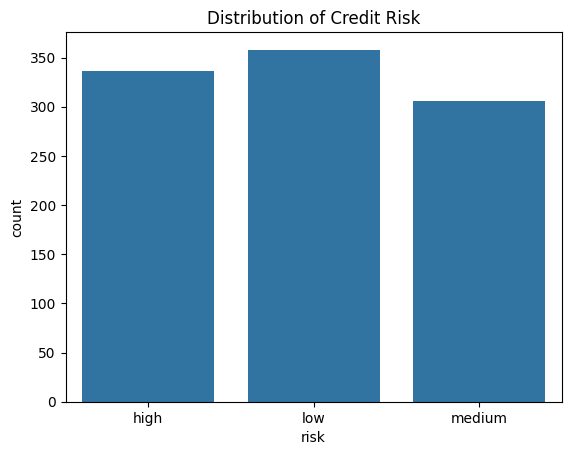

In [16]:
sns.countplot(x="risk", data=df)
plt.title("Distribution of Credit Risk")
plt.show()


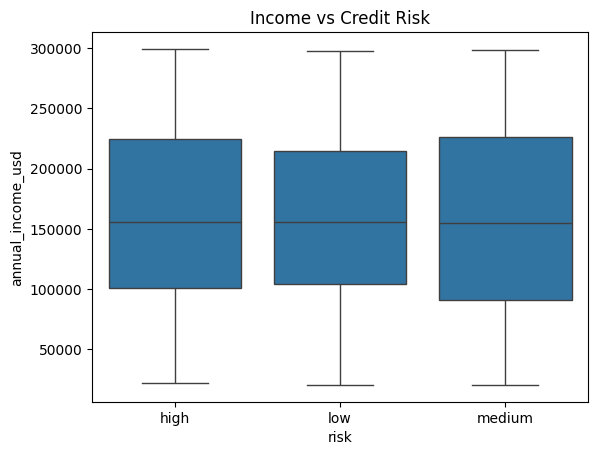

In [17]:
sns.boxplot(x="risk", y="annual_income_usd", data=df)
plt.title("Income vs Credit Risk")
plt.show()

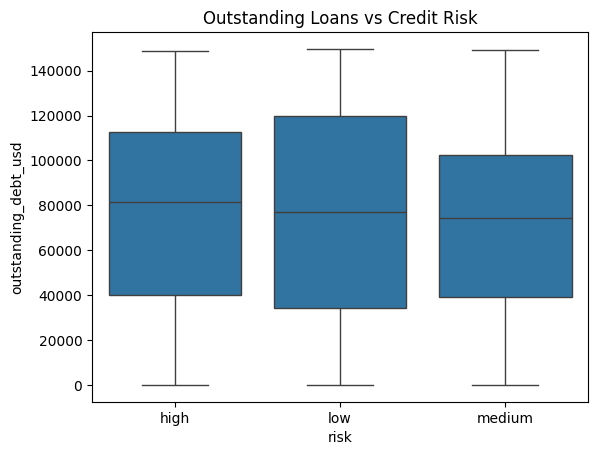

In [18]:
sns.boxplot(x="risk", y="outstanding_debt_usd", data=df)
plt.title("Outstanding Loans vs Credit Risk")
plt.show()

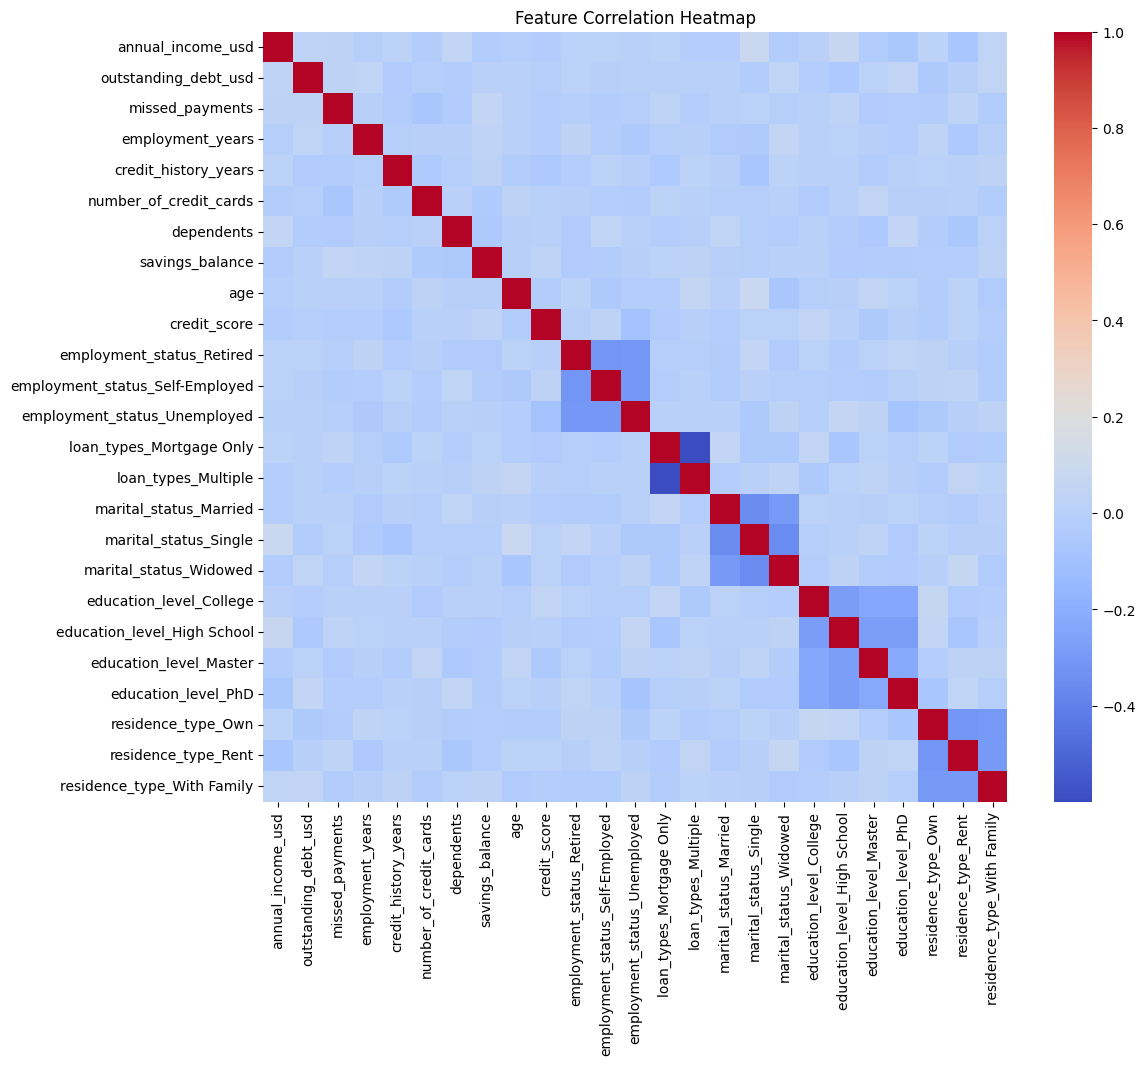

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
X = df.drop(["risk", "credit_score"], axis=1)
y = df["risk"]


In [21]:
le = LabelEncoder()
y = le.fit_transform(y)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [23]:
# Identify categorical and numerical columns in X_train and X_test
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(exclude=['object']).columns

# Apply one-hot encoding to categorical features
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# Align columns to ensure both train and test sets have the same feature columns
train_cols = X_train_encoded.columns
test_cols = X_test_encoded.columns

# Add missing columns to the test set and fill with 0
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_encoded[c] = 0

# Add missing columns to the train set and fill with 0
missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_encoded[c] = 0

# Ensure the order of columns is consistent
X_test_encoded = X_test_encoded[train_cols]

# Now, apply StandardScaler to the fully numerical datasets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_encoded)
X_test = scaler.transform(X_test_encoded)

In [24]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_leaf=10,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=10, n_estimators=300, random_state=42)

In [25]:
y_pred = rf.predict(X_test)



In [26]:
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

        high       0.32      0.29      0.30        84
         low       0.29      0.33      0.31        90
      medium       0.32      0.30      0.31        76

    accuracy                           0.31       250
   macro avg       0.31      0.31      0.31       250
weighted avg       0.31      0.31      0.31       250



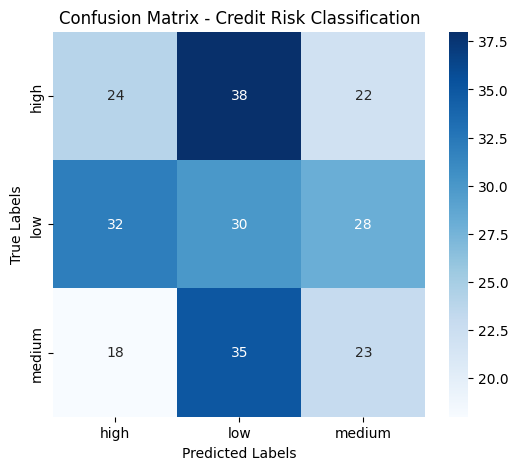

In [27]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Credit Risk Classification")
plt.show()


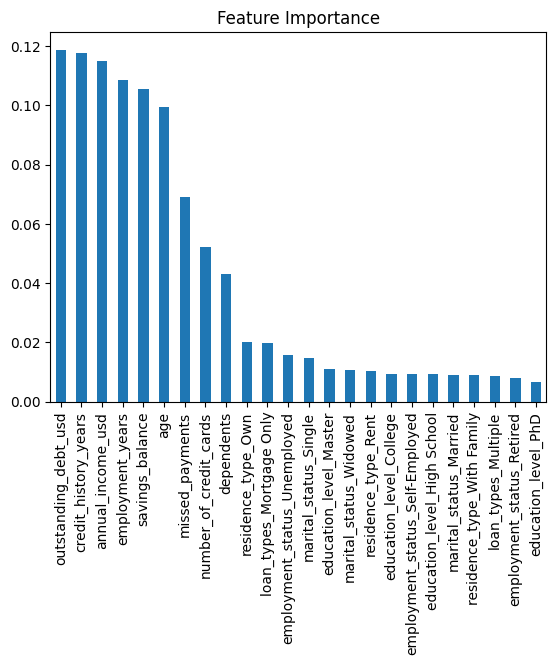

In [28]:
importance = pd.Series(
    rf.feature_importances_,
    index=X_train_encoded.columns
).sort_values(ascending=False)

importance.plot(kind="bar", title="Feature Importance")
plt.show()